# Исследование рынка продаж компьютерных игр

<b> Описание проекта<b/>

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет магазина «Стримчик», который продаёт по всему миру компьютерные игры.

# План работы

<div>

* <b>Изучить общую информацию о данных</b>

* <b>Выполнить предобработку данных</b>
    * Обработать пропуски
    * Изменить типы данных там, где это необходимо
    * Обработать дубликаты
    * Добавить столбец с общих количеством продаж по всем регионам

* <b>Провести исследовательскй анализ данных и дополнительные расчеты:</b>
    * Выбор актуальных игровых платформ и периода релиза игр 
    * Исследование продаж по актуальным платформам
    * Влияние отзывов пользователей и критиков на продажи
    * Влияние жанра игры на продажи

* <b>Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):</b>
    * Самые популярные платформы (топ-5)
    * Самые популярные жанры (топ-5)
    * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
* <b>Проверить гипотезы:</b>    
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
</div>

<b>Описание данных<b/>

<div>

* <b>Name </b> — название игры

* <b>Platform </b> — платформа

* <b>Genre </b> — жанр игры

* <b>NA_sales </b> — продажи в Северной Америке (миллионы проданных копий)

* <b>EU_sales</b> — продажи в Европе (миллионы проданных копий)

* <b>JP_sales</b> — продажи в Японии (миллионы проданных копий)
    
* <b>Other_sales</b> — продажи в других странах (миллионы проданных копий)
    
* <b>Critic_Score</b> — оценка критиков (максимум 100)
    
* <b>User_Score</b> — оценка пользователей (максимум 10)
    
* <b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    

</div>

# Шаг 1. Изучение общей информации о данных

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')  
except:
    data = pd.read_csv('games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


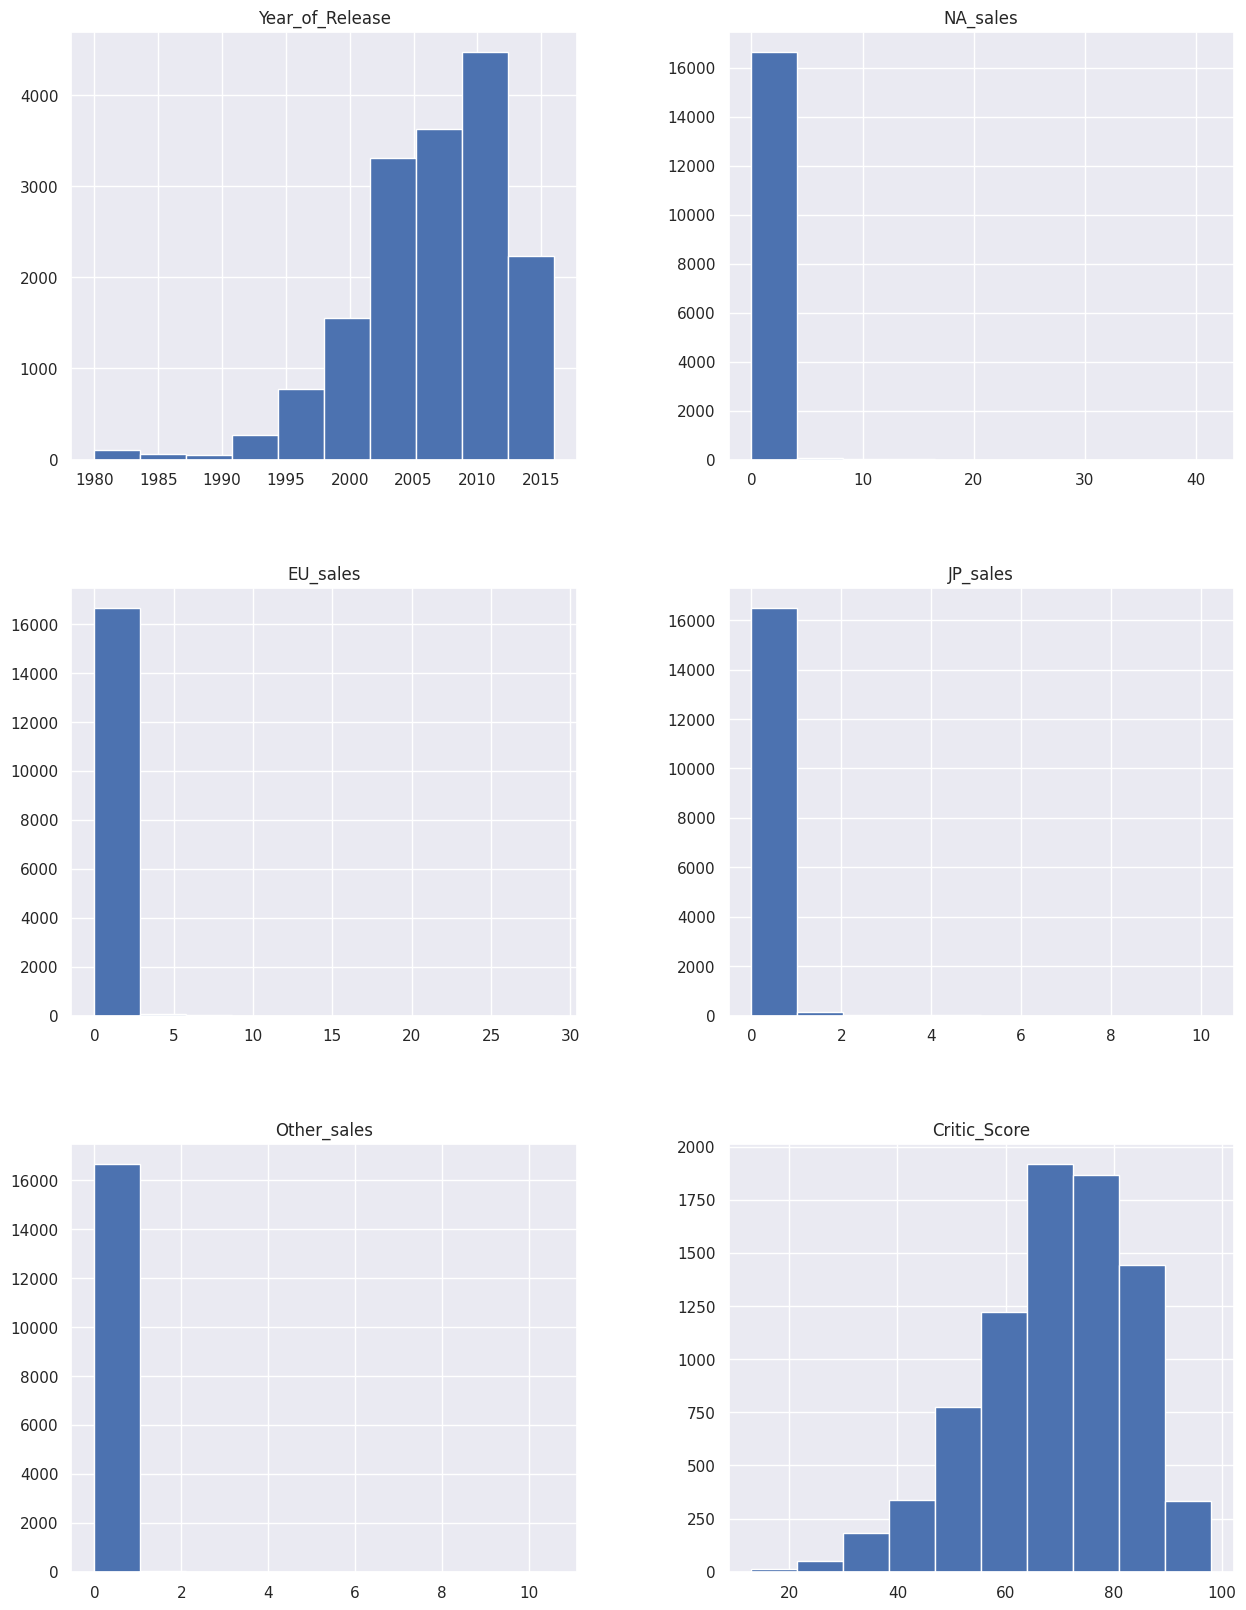

In [6]:
data.hist(figsize=(15, 20));

In [7]:
#Количество дубликатов
data.duplicated().sum()

0

<b>Вывод</b>

Данные загружены в файл. Всего у нас 16715 записей. В нескольких столбцах есть пропущенные данные и некорректные типы данных. Дубликатов не обнаружено. Перейдем к предобработке

# Шаг 2. Предобработка данных

In [8]:
#Посмотрим на количество пропущенных значений
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        # Вычисляем процент отсутствующих значений
        missing_values = (df.isna().mean()*100).to_frame().rename(columns={0:'space'})

        # Отфильтруем столбцы с 0% отсутствующих значений
        missing_values = missing_values.query('space > 0')

        # Сортировка столбцов по возрастанию процента отсутствующих значений
        missing_values = missing_values.sort_values(by='space', ascending=True)

        # Создаем горизонтальную гистограмму
        fig, ax = plt.subplots(figsize=(15, len(missing_values)/2))
        ax.barh(missing_values.index, missing_values['space'], color='steelblue')

        # Добавляем метки и линии сетки
        ax.set_xlabel('Процент пропущенных значений', fontsize=14)
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # Размер оси у
        ax.tick_params(axis='y', labelsize=12)

        # Название графика
        ax.set_title('Пропущенные значения в столбцах', fontsize=18, color='steelblue', pad=20)

        # Показываем график
        plt.show()
        
    except:
        print('Ошибка: Не удалось построить график отсутствующих значений.')


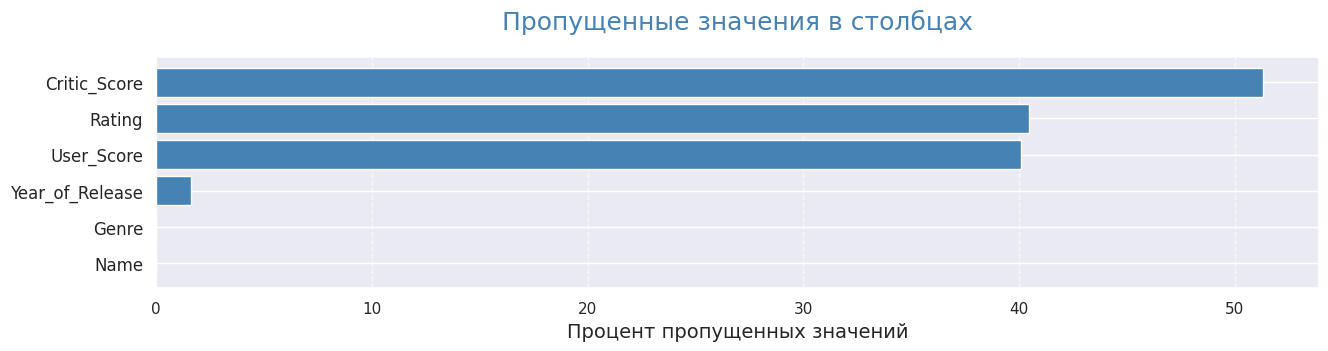

In [10]:
pass_value_barh(data)

In [11]:
#Приведем названия колонок к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [12]:
#Смотрим на пропущенные значения в столбце name
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущены названия двух игр. Кроме названий, в этих играх пропущены и другие значения. Избавимся от этих строк

In [13]:
data = data[data['name'].notna()]
data.name.isna().sum()

0

In [14]:
#Смотрим на пропущенные значения в столбце year_of_release
data[data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
#Посмотрим на долю пропусков 
data['year_of_release'].isna().sum()/ len(data['year_of_release'])

0.016095255190570215

Можно было бы заполнить некотрые пропуски, предположив, что игры одновременно выходят на нескольких платформах. Но так как это невсегда верно, ведь бывают эксклюзивы для определенных платформ, а доля пропусков незначительна, просто избавимся от них. Так же изменим тип данных на int 

In [16]:
#Удаляем строки
data = data.dropna(subset=['year_of_release'])
#Меняем тип данных на int
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].isna().sum()

<ipython-input-16-c37256c327a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].astype('int')


0

Посмотрим, есть ли дубликаты по нескольким столбцам

In [17]:
display(data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [18]:
# Удалим дубликат
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'], keep='first')

Рассмотрим столбцы critic_score и user_score, в которых у нас есть много пропусков

In [19]:
data['critic_score'].isna().sum()/ len(data['critic_score'])

0.5145654685884571

In [20]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [21]:
data.loc[data['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Информация об оценках отсутствует для разных платформ, жанров и годов выпуска игр. Вероятно, это связано с тем, что оценки не были доступны на момент сбора информации или данные были потеряны при загрузке/выгрузке таблицы из базы.

Невозможно заполнить пропущенные оценки на основе имеющихся данных, поскольку игры одного жанра и года выпуска могут существенно отличаться друг от друга. Оценки одной и той же игры на разных платформах также могут сильно различаться. Поэтому, оставим все как есть

In [22]:
data['user_score'].isna().sum()/ len(data['critic_score'])

0.4016906890470109

In [23]:
data.loc[data['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Здесь такая же ситуация, как и со столбцом critic_score. Оставим пропуски как есть

In [24]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратим внимание на значение tbd (to be determined). Это аббревиатура означает, что оценки игры не было на момент сбора информации. Заменим значение tbd на NaN

In [25]:
data.user_score.replace('tbd', np.nan, inplace=True)
data['user_score'] = data['user_score'].astype('float')

Рассмотрим столбец rating

In [26]:
data['rating'].isna().sum()/ len(data['rating'])

0.40600863589369335

In [27]:
data.loc[data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Информация об оценках отсутствует для разных платформ, жанров и годов выпуска игр. Вероятно, это связано с тем, что рейтинги не были доступны на момент сбора информации или данные были потеряны при загрузке/выгрузке таблицы из базы. Так же стоит учесть, что рейтинг ESRB появился в 1994 году, а в наших данных годы выпуска игр начинаются с 1984 года.

Невозможно заполнить пропущенные рейтинги на основе имеющихся данных, поскольку игры одного жанра и года выпуска могут значительно отличаться друг от друга. Пока оставим пропуски как есть

In [28]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Посмотрим информацию на сайте ESRB(Entertainment Software Rating Board):
* <b>E</b> - everyone (контент для всех)
* <b>E10+</b> - everyone 10+ (от 10 лет и выше)
* <b>T</b> - teen (от 13 лет и выше)
* <b>M</b> - mature (от 17 лет и выше)
* <b>KA</b> - kids to adults (старое обозначение рейтинга "E")
* <b>AO</b> - adults only (от 18 лет и выше)
* <b>EC</b> - early childhood (заменён рейтингом "E" ввиду малого использования)
* <b>RP</b> - rating pending (рейтинг пока не определён)

In [29]:
data[data['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


Таким образом, значения EC и K-A заменим на E. Значение RP всего одно, заменим его на np.nan

In [30]:
data.loc[(data['rating'] == 'EC') | (data['rating'] == 'K-A'), 'rating'] = 'E'
data.loc[data['rating'] == 'RP', 'rating'] = np.nan
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO'], dtype=object)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [32]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<b>Вывод</b>

Была произведена обработка данных. Удалены дубликаты, преобразованы типы данных, в столбце years_of_release удалены пропущенные значения. В столбцах critic_score, user_score и rating пропуски оставленны как есть, т.к. отсутствует способы их оптимального заполнения. Возможно, часть таких пропусков отсеется, когда будем определять список актуальных игровых платформ и периода релиза игр

# Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

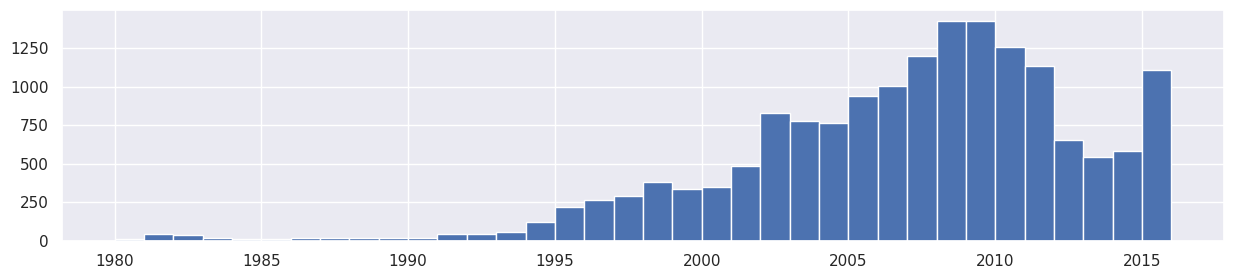

In [33]:
data.year_of_release.hist(bins = 36, figsize = (15,3));

По гистограмме видим, что до 1990 года выпускалось сравнительно мало игр. Они не будут актуальны для нашего исследования. Посмотрим, как менялись продажи по платформам

In [34]:
#Платформы с наибольшими суммарными продажами за всё время. Возьмем топ 20, чтобы затем проще было смотреть график
top20_platforms = (data
                 .groupby('platform')['total_sales']
                 .agg('sum')                           
                 .sort_values(ascending=False)         
                 .reset_index() 
                 .head(20)
                )   
top20_platforms             

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


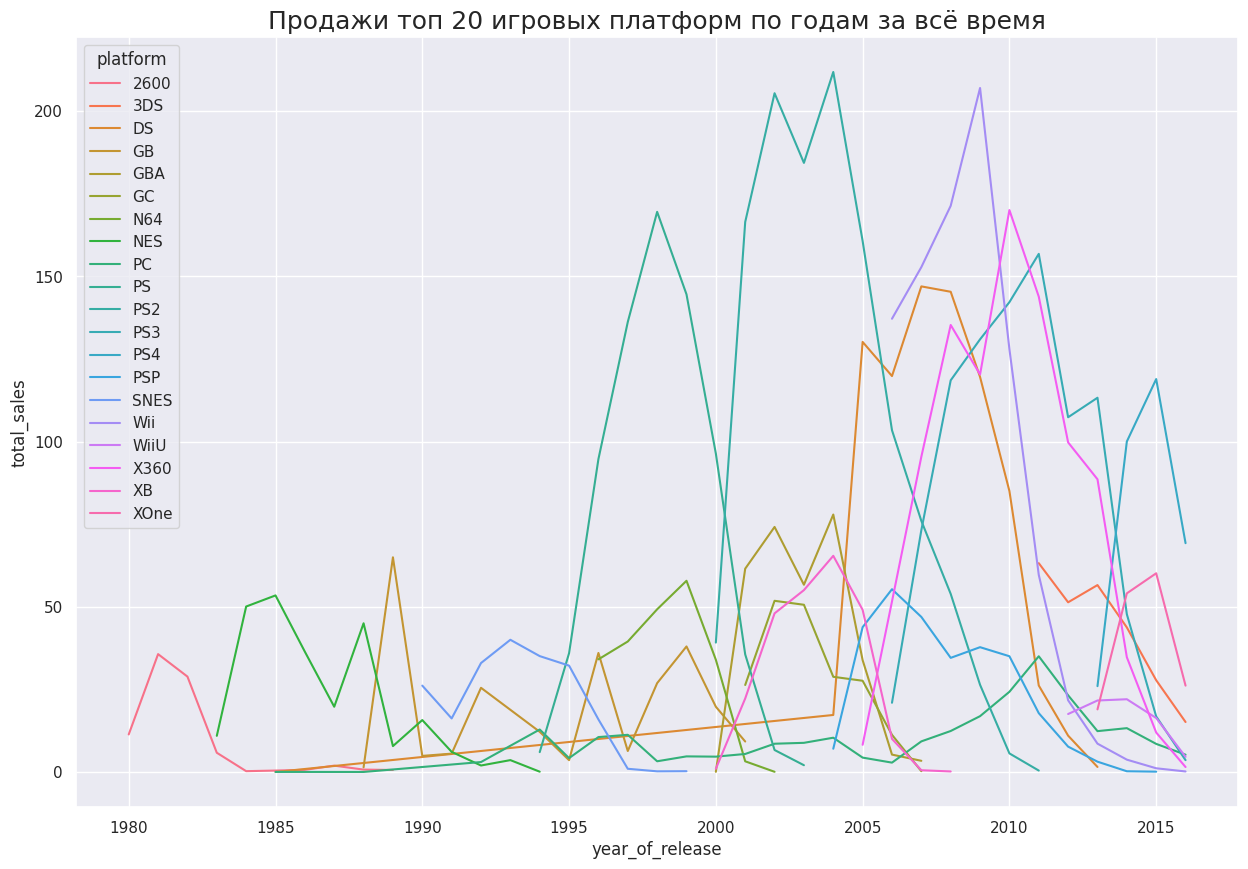

In [35]:
#Определим, за какой характерный срок появляются новые и исчезают старые платформы
plt.figure(figsize=(15,10))
plt.title('Продажи топ 20 игровых платформ по годам за всё время', fontsize=18)
sns.lineplot(x='year_of_release',
            y='total_sales',
            hue='platform',
            markers=True,
            data=(
                      data[data['platform'].isin(top20_platforms['platform'])]
                      .groupby(['platform','year_of_release'])['total_sales']
                      .agg('sum')                                            
                      .reset_index())
            );


Согласно графику, основные платформы оставались популярными в течение 5-10 лет

Чтобы определить актуальный период, посмотрим на платформы, для которых выпускались игры в 2016 году

In [36]:
actual_platforms = (data
                 .loc[data['year_of_release'] == 2016, 'platform']
                 .unique()
                )
actual_platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

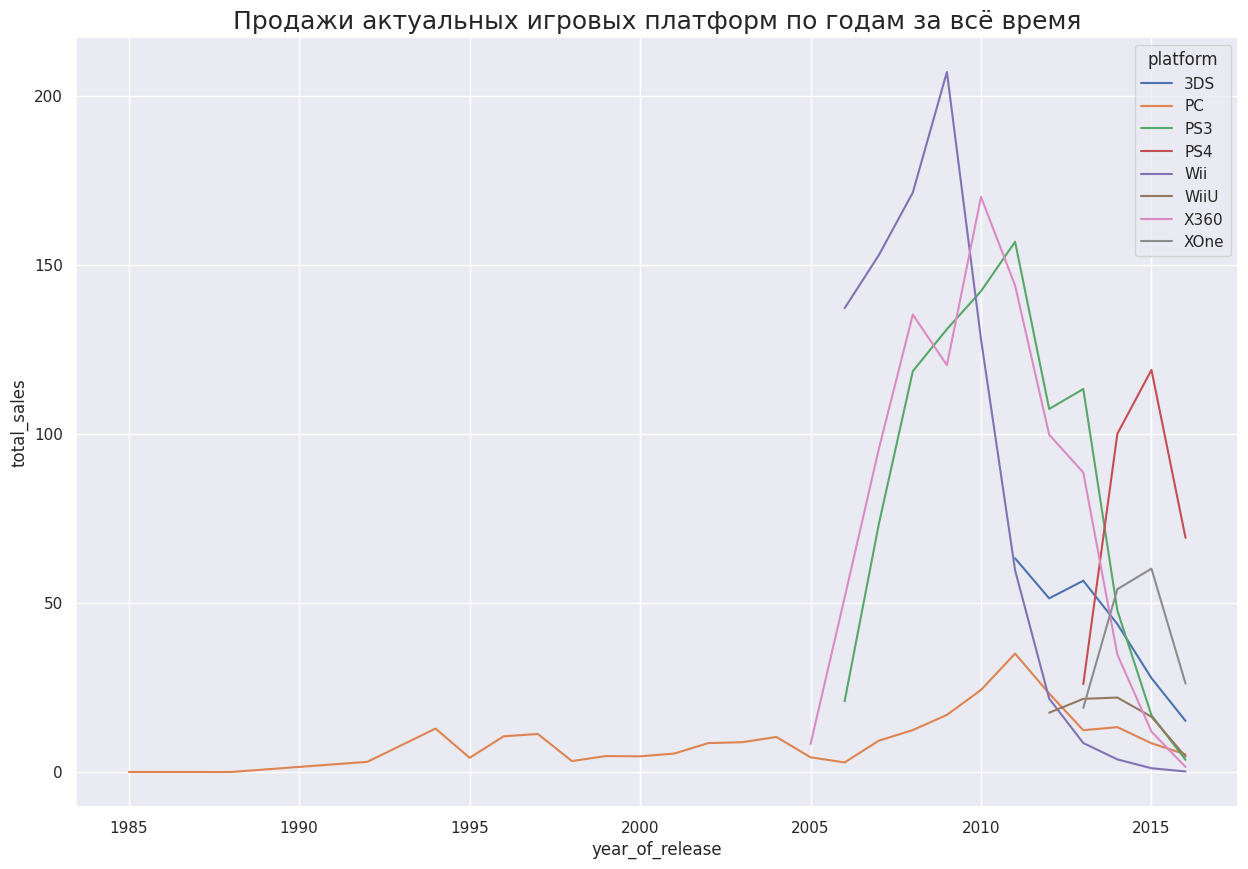

In [37]:
plt.figure(figsize=(15,10))
plt.title('Продажи актуальных игровых платформ по годам за всё время', fontsize=18)
sns.lineplot(x='year_of_release',
            y='total_sales',
            hue='platform',
            markers=True,
            data=(
                      data[data['platform'].isin(top20_platforms['platform']) &
                      data['platform'].isin(actual_platforms)]
                      .groupby(['platform','year_of_release'])['total_sales']
                      .agg('sum')                                            
                      .reset_index())
            );


Из графика следует, что большинство игровых платформ, которые были актуальны к 2016 году, были выпущены после 2010 года. Также стоит отметить, что игровые платформы 'PS3', 'X360' и 'Wii', которые были актуальны к 2010 году, к 2016 году практически перестали продаваться, так как были заменены новыми поколениями игровых платформ 'PS4', 'XOne' и 'WiiU'. В связи с этим нет необходимости рассматривать старые платформы, поэтому мы не будем учитывать их при анализе.

Таким образом, за актуальный период будем считать 2010-2016 года, а актуальными платформами - 'PS4', '3DS', 'XOne', 'WiiU', 'PC'. Построим распределение суммарных продаж по годам для актуальных игровых платформ за актуальный период

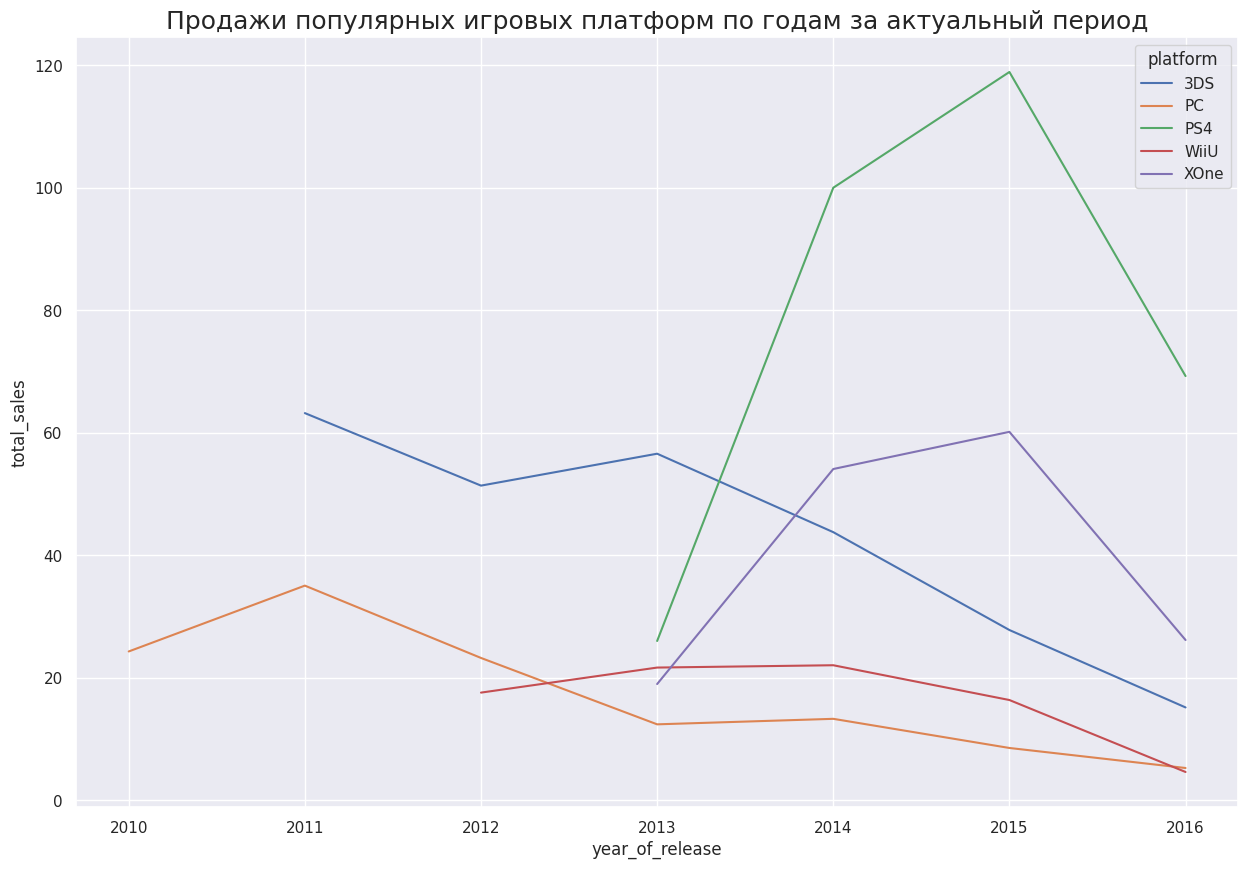

In [38]:
actual_platforms = ['PS4', '3DS', 'XOne', 'WiiU', 'PC']
plt.figure(figsize=(15,10))
plt.title('Продажи популярных игровых платформ по годам за актуальный период', fontsize=18)
sns.lineplot(x='year_of_release',
            y='total_sales',
            hue='platform',
            markers=True,
            data=(
                      data.query('platform in @actual_platforms and year_of_release >= 2010')
                      .groupby(['platform','year_of_release'])['total_sales']
                      .agg('sum')                                            
                      .reset_index())
            );


Уровень продаж для платформ 'PS4', 'WiiU' и 'XOne' снизился в 2016 году, вероятно, из-за того, что на момент сбора данных год еще не закончился.

Если проанализировать изменения суммарных продаж выбранных платформ со временем, то можно отметить следующее:

* 'PS4' и 'XOne' демонстрировали рост суммарных продаж с 2013 по 2015 годы.
* На момент окончания 2015 года и на момент сбора данных в 2016 году 'PS4' была лидером по продажам.
* Суммарные продажи '3DS' медленно снижались с 2011 года.
* Суммарные продажи 'WiiU' практически не менялись и оставались на уровне 20 млн копий с 2012 по 2015 годы.
* Суммарные продажи игр на 'PC' были невысокими (максимум 35 млн копий в 2011 году) и медленно снижались с 2011 года.
Однако игры на 'PC' продавались с 1980-х годов, со временными подъемами и спадами, и в этом отношении 'PC' была самой стабильной из всех рассматриваемых игровых платформ.

<b>Анализ продаж перспективных платформ</b>

In [39]:
#Отфильтруем данные по актуальным платформам и периоду
top_games = data.query('platform in @actual_platforms and year_of_release >= 2010')
top_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


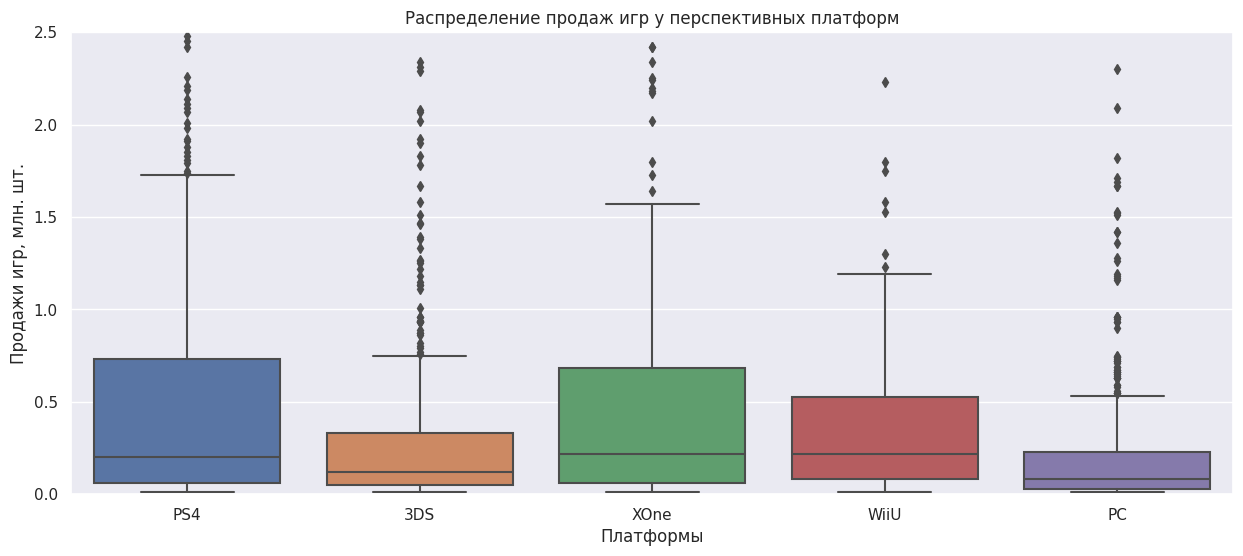

In [40]:
#Построим ящик с усами
plt.figure(figsize=(15,6))

ax = sns.boxplot(x='platform', y='total_sales', data=top_games)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

Медианные продажи на всех платформах смещены вниз, что указывает на большое количество игр с низкими продажами. Однако на каждой платформе есть бестселлеры, продажи которых значительно превышают средние значения. Медианные продажи 'PS4', 'XOne' и 'WiiU' примерно равны и составляют около 0,2 млн копий. Дисперсия продаж у 'WiiU' немного меньше, чем у 'PS4' и 'XOne'. Однако, суммарные продажи по годам для 'PS4' и 'XOne' значительно превышают продажи 'WiiU'

<b> Влияние отзывов пользователей и критиков на продажи по платформе 'XOne'</b>

Подсчитаем коэффициенты корреляции между глобальными продажами и оценками критиков и пользователей для платформы XOne

In [41]:
top_games.query('platform == "XOne"')['total_sales'].corr(top_games.query('platform == "XOne"')['critic_score'])

0.41699832800840175

In [42]:
top_games.query('platform == "XOne"')['total_sales'].corr(top_games.query('platform == "XOne"')['user_score'])

-0.06892505328279412

Для наглядности построим диаграммы рассеяния

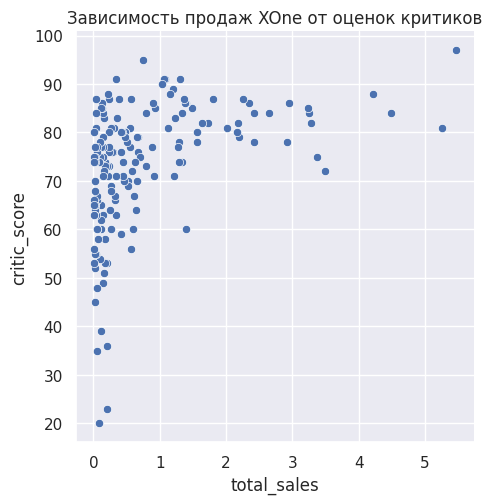

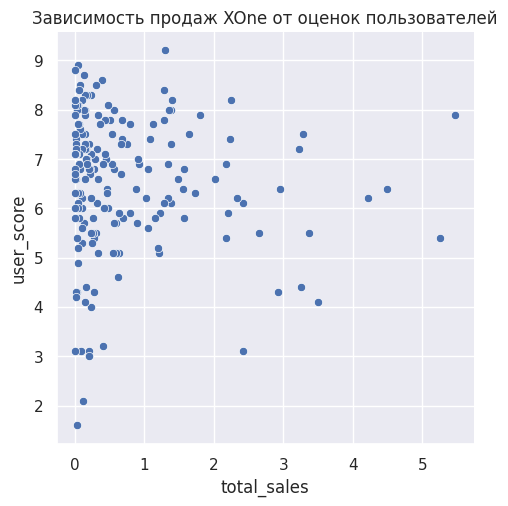

In [43]:
sns.relplot(x='total_sales', y='critic_score', data=top_games.query('platform == "XOne"'))
plt.title('Зависимость продаж XOne от оценок критиков')
sns.relplot(x='total_sales', y='user_score',data=top_games.query('platform == "XOne"'))
plt.title('Зависимость продаж XOne от оценок пользователей')
plt.show()

Из графиков можно увидеть, что существует некоторая связь между отзывами критиков и глобальными продажами игр на XOne, подтверждаемая коэффициентом корреляции 0.42. Однако между глобальными продажами игр на XOne и отзывами пользователей не наблюдается корреляции, как подтверждает коэффициент корреляции -0.07.

Найдём коэффициенты корреляции по остальным платформам и сравним результаты

In [44]:
top_games.groupby('platform')[['total_sales', 'critic_score', 'user_score']].corr()

total_sales  critic_score  user_score
platform                                                    
3DS      total_sales      1.000000      0.348740    0.222078
         critic_score     0.348740      1.000000    0.745222
         user_score       0.222078      0.745222    1.000000
PC       total_sales      1.000000      0.336497   -0.011087
         critic_score     0.336497      1.000000    0.478158
         user_score      -0.011087      0.478158    1.000000
PS4      total_sales      1.000000      0.406568   -0.031957
         critic_score     0.406568      1.000000    0.557654
         user_score      -0.031957      0.557654    1.000000
WiiU     total_sales      1.000000      0.348380    0.400219
         critic_score     0.348380      1.000000    0.770080
         user_score       0.400219      0.770080    1.000000
XOne     total_sales      1.000000      0.416998   -0.068925
         critic_score     0.416998      1.000000    0.472462
         user_score      -0.068925      0.472462    1.000000

Наблюдается небольшая корреляция (0.34 - 0.42) между глобальными продажами и оценками критиков на всех игровых платформах. Однако, на платформах PS4, XOne и PC нет корреляции между глобальными продажами и оценками пользователей, за исключением платформы 3DS, где корреляция составляет 0.22. Для платформы WiiU корреляция между глобальными продажами и оценками пользователей еще выше (0.4), что говорит о том, что пользователи WiiU обращают больше внимания на мнение других игроков перед покупкой игр, помимо оценок критиков. В целом, оценки критиков имеют больший вес в продвижении игровых платформ

<b>Влияние жанра игры на продажи</b>

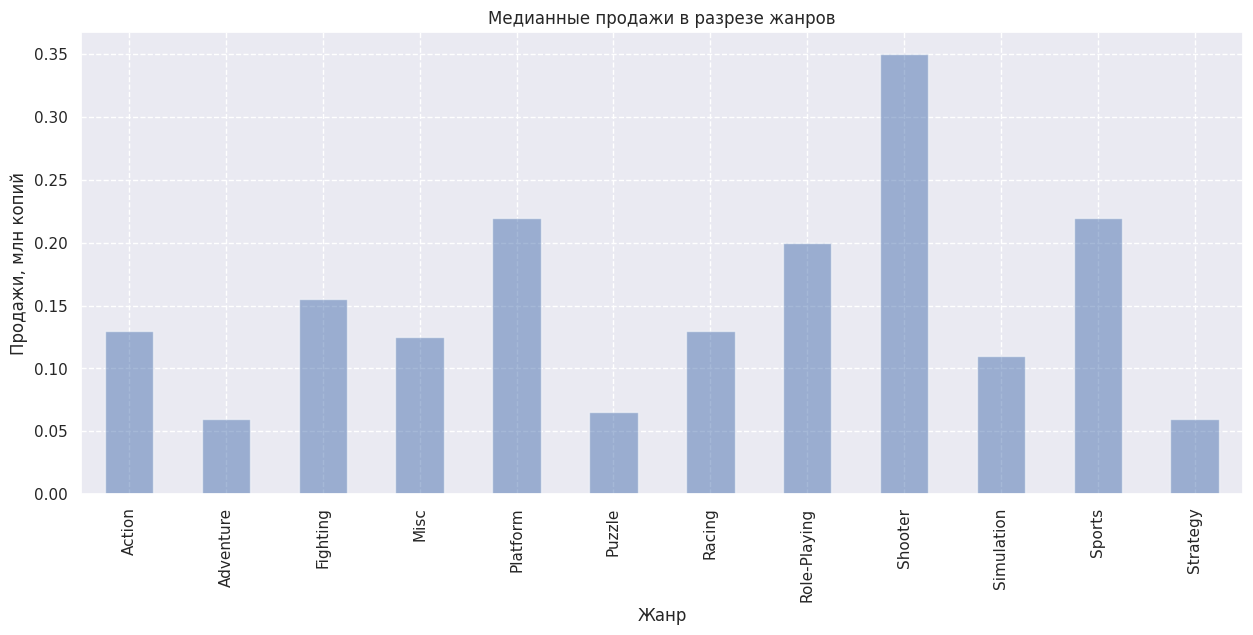

In [45]:
#Построим график медианных значений продаж по жанрам игр
fig, ax = plt.subplots()

(top_games
 .groupby('genre')['total_sales']
 .agg('median')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(15,6), alpha=0.5))

ax.set_title('Медианные продажи в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

Судя по графику, самым продаваемым жанром игр являются Shooter (0.35 млн копий). Так же популярны жанры Sports, Platform и Role-Playing (примерно 0.2 млн. копий на каждый). К самым непопулярным жанрам относятся Puzzle, Adventure и Strategy (примерно 0.06 млн. копий на каждый)

# Шаг 4. Составьте портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж
* Самые популярные жанры (топ-5). Поясним разницу.
* Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [46]:
#Самые популярные платформы по регионам. Возьмем период с 2010 года
popular_platforms = data.loc[data['year_of_release'] >= 2010].pivot_table(
    index='platform',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum'
).apply(lambda x: round(x / float(x.sum()), 2))
popular_platforms

,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.07,0.33,0.07
DS,0.03,0.09,0.05
PC,0.08,0.00,0.03
PS2,0.00,0.00,0.00
PS3,0.25,0.19,0.20
PS4,0.17,0.05,0.10
PSP,0.01,0.14,0.01
PSV,0.02,0.07,0.01
Wii,0.08,0.06,0.11


In [47]:
#Топ-5 платформ в Европе:
popular_platforms['eu_sales'].sort_values(ascending=False).head(5)

platform
PS3     0.25
X360    0.19
PS4     0.17
PC      0.08
Wii     0.08
Name: eu_sales, dtype: float64

In [48]:
#Топ-5 платформ в Северной Америке:
popular_platforms['na_sales'].sort_values(ascending=False).head(5)

platform
X360    0.30
PS3     0.20
Wii     0.11
PS4     0.10
XOne    0.08
Name: na_sales, dtype: float64

In [49]:
#Топ-5 платформ в Японии:
popular_platforms['jp_sales'].sort_values(ascending=False).head(5)

platform
3DS    0.33
PS3    0.19
PSP    0.14
DS     0.09
PSV    0.07
Name: jp_sales, dtype: float64

Предпочтения в игровых платформах для Европы и Северной Америки схожи: в ТОП5 входят различные поколения PS, Nintendo (Wii) и Xbox. В Европе также популярны игры на PC. В Японии кроме PS, также популярны платформы серии DS

In [50]:
#Самые популярные жанры по регионам. Возьмем период с 2010 года
popular_genres = data.loc[data['year_of_release'] >= 2010].pivot_table(
    index='genre',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum'
).apply(lambda x: round(x / float(x.sum()), 2))
popular_genres

,eu_sales,jp_sales,na_sales
genre,,,
Action,0.28,0.24,0.26
Adventure,0.02,0.05,0.02
Fighting,0.02,0.05,0.03
Misc,0.08,0.08,0.11
Platform,0.05,0.05,0.05
Puzzle,0.01,0.01,0.01
Racing,0.07,0.02,0.04
Role-Playing,0.09,0.34,0.10
Shooter,0.20,0.05,0.21


In [51]:
#Топ-5 жанров в Европе:
popular_genres['eu_sales'].sort_values(ascending=False).head(5)

genre
Action          0.28
Shooter         0.20
Sports          0.14
Role-Playing    0.09
Misc            0.08
Name: eu_sales, dtype: float64

In [52]:
#Топ-5 жанров в Северной Америке:
popular_genres['na_sales'].sort_values(ascending=False).head(5)

genre
Action          0.26
Shooter         0.21
Sports          0.14
Misc            0.11
Role-Playing    0.10
Name: na_sales, dtype: float64

In [53]:
#Топ-5 жанров в Японии:
popular_genres['jp_sales'].sort_values(ascending=False).head(5)

genre
Role-Playing    0.34
Action          0.24
Misc            0.08
Adventure       0.05
Fighting        0.05
Name: jp_sales, dtype: float64

Топ-5 жанров для Европы и Северной Америки практически одинаковый. А вот в Японии немного другая картина: здесь жанр Role-Playing на первом месте. А еще, в топ-5 жанров в Японии также входят Adventure и Fighting

In [54]:
#Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе
ESRB_sales = data.loc[data['year_of_release'] >= 2010].pivot_table(
    index='rating',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum'
).apply(lambda x: round(x / float(x.sum()), 2))
ESRB_sales

,eu_sales,jp_sales,na_sales
rating,,,
E,0.28,0.36,0.28
E10+,0.14,0.10,0.16
M,0.42,0.23,0.39
T,0.16,0.32,0.16


В Европе и Северной Америке снова похожая ситуация. Большая чась игр в этих регионах продается с рейтингом М (от 17 лет и выше) и Е (без ограничений). А в Японии самые популярные возрастные рейтинги Е и Т (от 13 лет и выше). Игры для взрослых в среднем покупают меньше, чем в Европе и Северной Америке.

По полученным результатом можно сделать вывод, что рынки Европы и Северной Америки очень похожи. Они ориентированы на более широкую аудиторию. Рынок Японии отличается от них. Менталитет игроков и изолированность японского рынка являются причинами различий в продажах между Японией и остальными регионами. Многие игры разрабатываются в Японии для внутреннего рынка и для собственных игровых платформ.

# Шаг 5. Проверка гипотез

Нам нужно проверить две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b>Средние пользовательские рейтинги платформ Xbox One и PC</b>

In [55]:
#Удалим пропуски и отфильтруем данные
xone = top_games.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)
pc = top_games.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

Посмотрим на распределения выборок и построим графики

In [56]:
xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

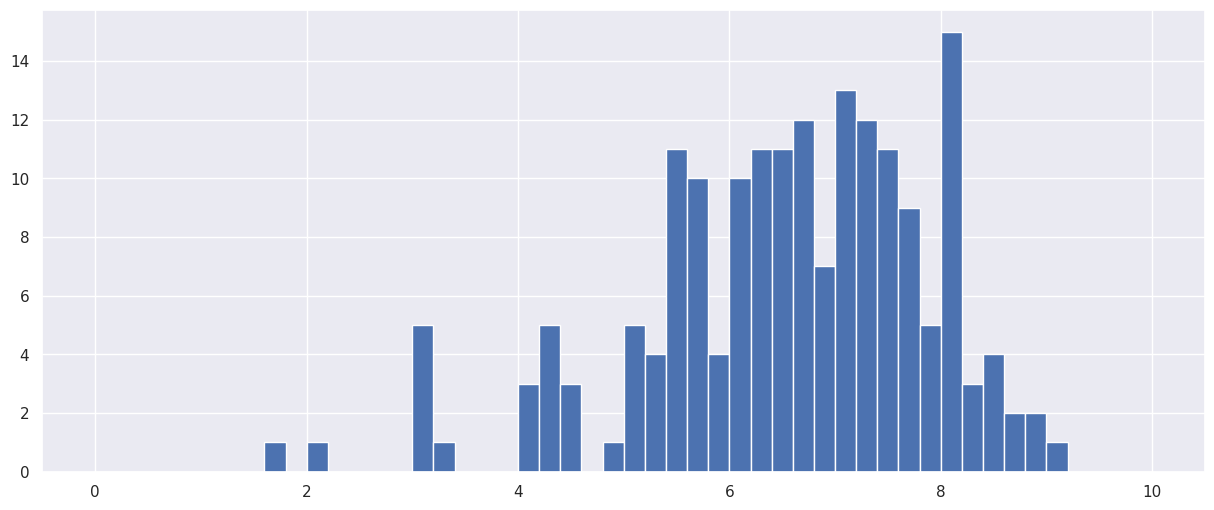

In [57]:
plt.figure(figsize=(15,6));
xone.hist(bins=50, range=(0,10));

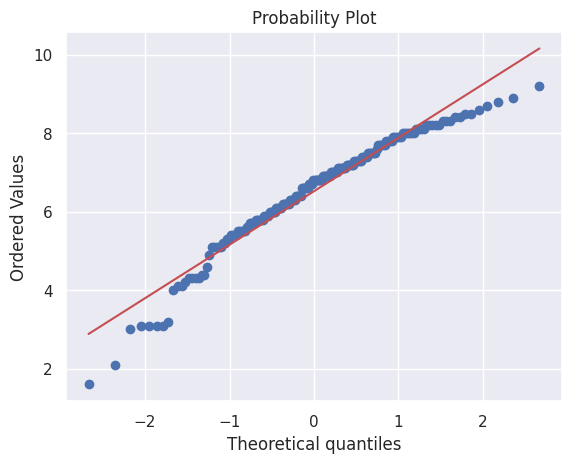

In [58]:
# проверим с помощью qqplot
st.probplot(xone, dist="norm", plot=plt)
plt.show()

In [59]:
pc.describe()

count    374.000000
mean       6.518182
std        1.565390
min        1.400000
25%        5.600000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

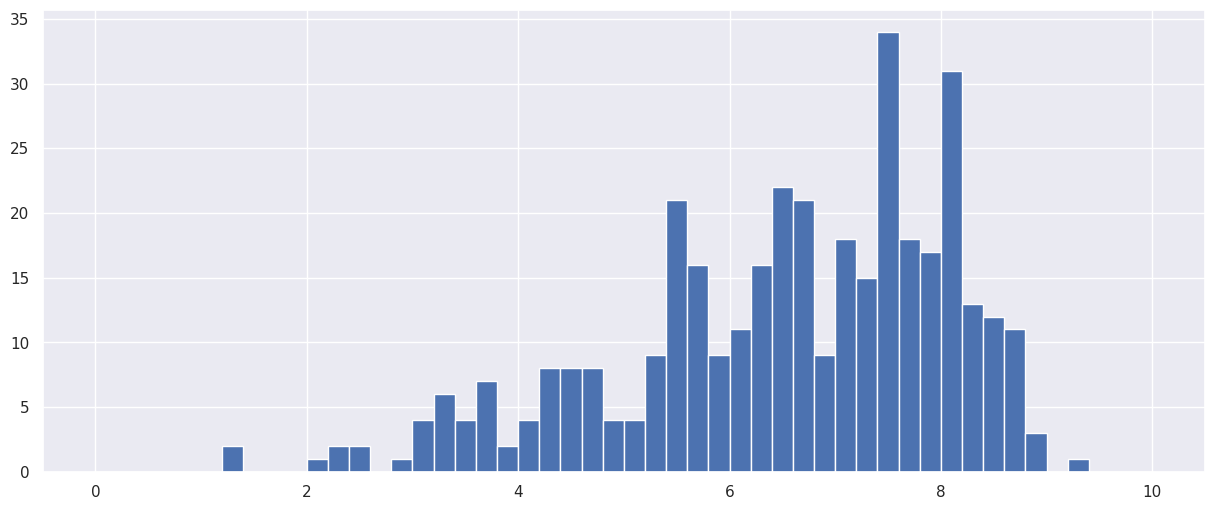

In [60]:
plt.figure(figsize=(15,6));
pc.hist(bins=50, range=(0,10));

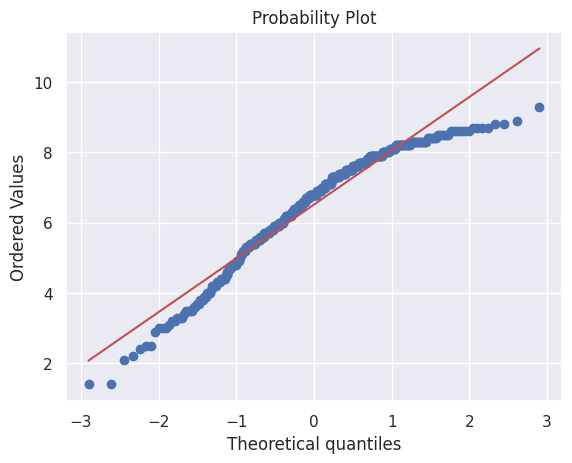

In [61]:
# проверим с помощью qqplot
st.probplot(pc, dist="norm", plot=plt)
plt.show()

Оценок игр на PC намного больше. В целом, распределения близки к нормальным. Проверим первую гипотезу

Введем основную и альетрнативную гипотезы:<br>
<b>H0</b>: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
<b>H1</b>: Средние пользовательские рейтинги платформ Xbox One и PC различаются<br>
Уровень значимости alpha примем 0.05

Для сравнения средних значений двух выборок, мы используем метод ttest из библиотеки scipy для расчета p-value. Так как размеры выборок отзывов пользователей на PC и XOne различаются (PC имеет большую выборку), мы используем метод st.stats.ttest_ind с параметром equal_var=False, чтобы учесть неодинаковость выборок.

Если расчитанный p-value меньше уровня значимости (0.05), то мы отвергаем нулевую гипотезу о равенстве средних значений выборок. В противном случае, мы не можем отвергнуть нулевую гипотезу и делаем вывод, что данные не дали достаточной основы для ее отвержения.

In [62]:
alpha = .05 

results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение: ', results.pvalue)   
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


p-value равен 0.98 и больше alpha. Исходя из этого, для уровня значимости 0.05 нет оснований отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ PC и Xbox One одинаковые.

<b>Средние пользовательские рейтинги жанров Action и Sports</b>

In [63]:
#Удалим пропуски и отфильтруем данные
action = top_games.query('genre == "Action"').user_score.dropna().reset_index(drop=True)
sports = top_games.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

In [64]:
action.describe()

count    345.000000
mean       6.762029
std        1.347147
min        2.000000
25%        6.100000
50%        7.000000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

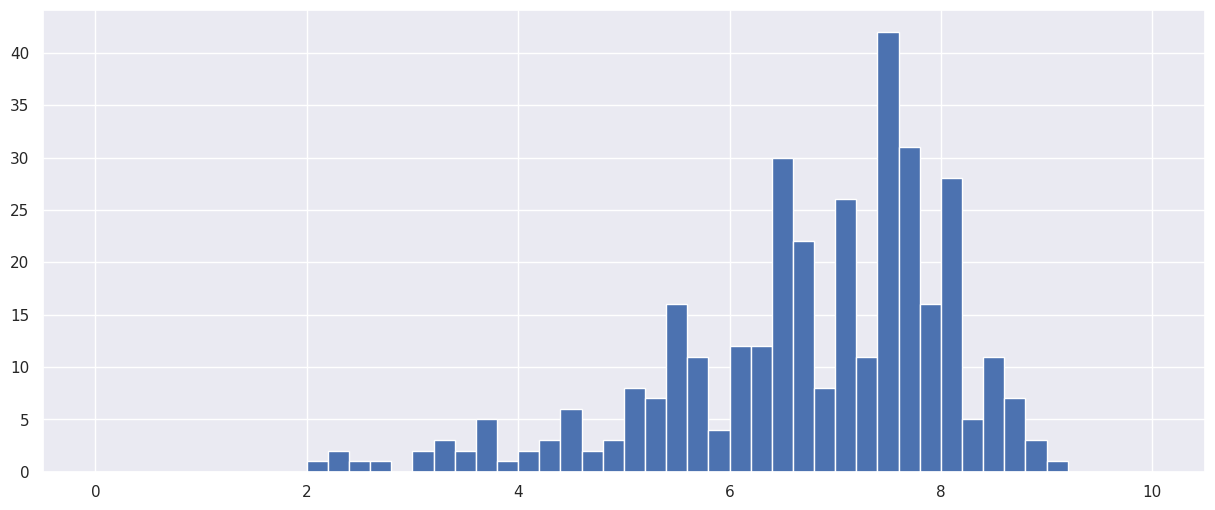

In [65]:
plt.figure(figsize=(15,6));
action.hist(bins=50, range=(0,10));

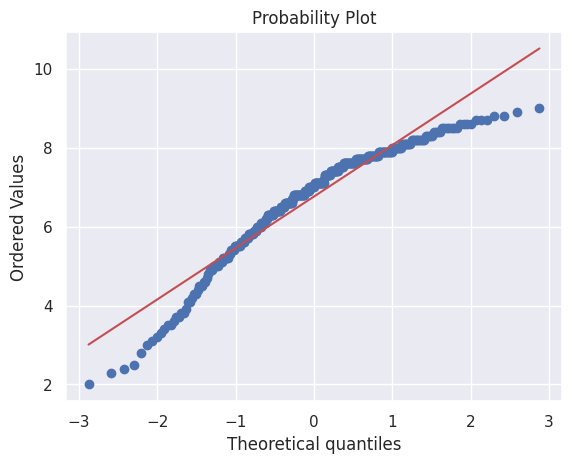

In [66]:
# проверим с помощью qqplot
st.probplot(action, dist="norm", plot=plt)
plt.show()

In [67]:
sports.describe()

count    115.000000
mean       5.715652
std        1.561241
min        1.400000
25%        4.950000
50%        5.900000
75%        6.800000
max        8.700000
Name: user_score, dtype: float64

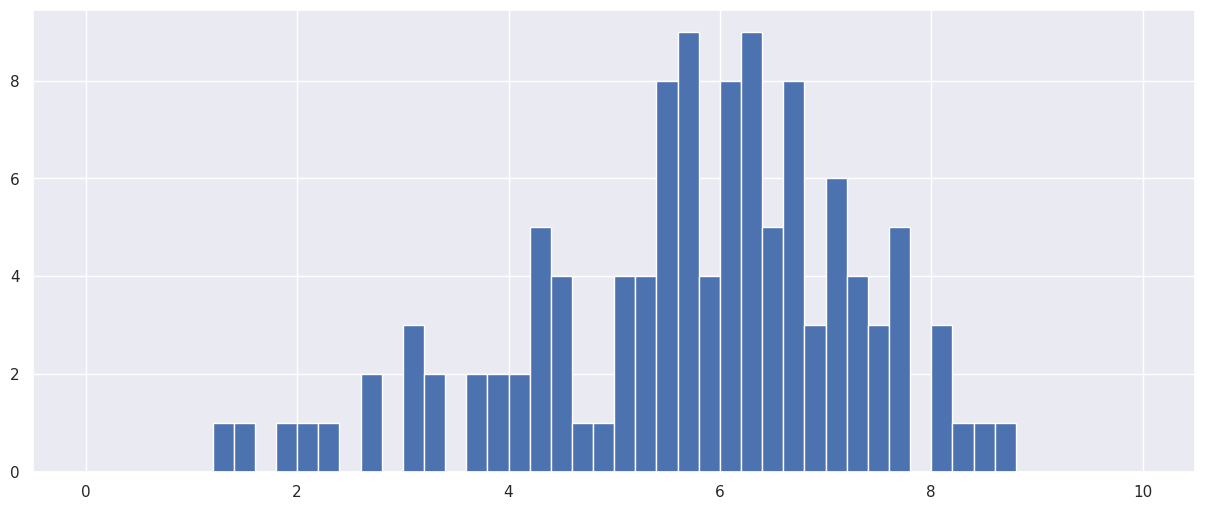

In [68]:
plt.figure(figsize=(15,6));
sports.hist(bins=50, range=(0,10));

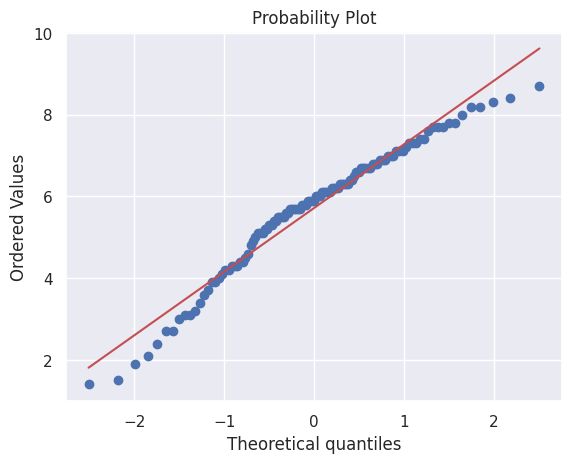

In [69]:
# проверим с помощью qqplot
st.probplot(sports, dist="norm", plot=plt)
plt.show()

Введем основную и альетрнативную гипотезы:<br>
<b>H0</b>: Средние пользовательские рейтинги жанров Action и Sports одинаковы<br>
<b>H1</b>: Средние пользовательские рейтинги жанров Action и Sports разные<br>
Уровень значимости alpha примем 0.05<br>

Для сравнения средних значений двух выборок, мы используем метод ttest из библиотеки scipy для расчета p-value. Так как размеры выборок отзывов пользователей на жанры Action и Sports различаются (Action имеет большую выборку), мы используем метод st.stats.ttest_ind с параметром equal_var=False, чтобы учесть неодинаковость выборок.<br>

Если расчитанный p-value меньше уровня значимости (0.05), то мы отвергаем нулевую гипотезу о равенстве средних значений выборок. В противном случае, мы не можем отвергнуть нулевую гипотезу и делаем вывод, что данные не дали достаточной основы для ее отвержения.

In [70]:
alpha = .05 
results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение: ', results.pvalue)   
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1666612585055367e-09
Отвергаем нулевую гипотезу


p-value практически равен нулю и меньше alpha. Исходя из этого, для уровня значимости 0.05 отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

# Шаг 6. Общий вывод

<b>1.</b> Данные загружены в файл. Всего у нас 16715 записей. В нескольких столбцах есть пропущенные данные и некорректные типы данных. Дубликатов не обнаружено.

<b>2.</b> Была произведена обработка данных. Удалены дубликаты, преобразованы типы данных, в столбце years_of_release удалены пропущенные значения. В столбцах critic_score, user_score и rating пропуски оставленны как есть, т.к. отсутствует способы их оптимального заполнения.

<b>3.</b> Проанализированы уровни глобальных продаж по различным игровым платформам. Выделены основные популярные платформы на 2016 год: 'PS4', '3DS', 'XOne', 'WiiU', 'PC'. Выделен актуальный период для исследования игр с 2010 по 2016 гг.

В ходе анализа данных, наблюдается небольшая корреляция (0.34 - 0.42) между глобальными продажами и оценками критиков на всех игровых платформах. Однако, на платформах PS4, XOne и PC нет корреляции между глобальными продажами и оценками пользователей, за исключением платформы 3DS, где корреляция составляет 0.22. Для платформы WiiU корреляция между глобальными продажами и оценками пользователей еще выше (0.4), что говорит о том, что пользователи WiiU обращают больше внимания на мнение других игроков перед покупкой игр, помимо оценок критиков. В целом, оценки критиков имеют больший вес в продвижении игровых платформ.

Рассмотрено влияние жанра игры на продажи.
Самым продаваемым жанром игр являются Shooter (0.35 млн копий). Так же популярны жанры Sports, Platform и Role-Playing (примерно 0.2 млн. копий на каждый). К самым непопулярным жанрам относятся Puzzle, Adventure и Strategy (примерно 0.06 млн. копий на каждый).

<b>4.</b> Были выявлены ТОП-5 платформ с наибольшей долей продаж в Северной Америке, Европе и Японии. В Европе и Северной Америке предпочтение отдается игровым платформам PS, Nintendo (Wii) и Xbox разных поколений. В Европе также любят игры на ПК. В Японии, помимо PS, популярны платформы серии DS.

Были также определены ТОП-5 жанров с наибольшей долей продаж в каждом регионе. Для Европы и Северной Америки эти данные почти не отличаются: Action, Shooter, Sports, Misc и Role-Playing. В Японии, кроме Role-Playing, Action и Misc, также любят Fighting и Adventure, а Shooter и Sports покупают гораздо меньше.

Были проанализированы зависимости уровня продаж игр от рейтинга ESRB в каждом регионе. Для Европы и Северной Америки большинство игр покупают с рейтингом "M" (17+) и "E" (без ограничений), что может быть связано с запросом игроков на взрослый контент в играх (рейтинг "М") и желанием компаний охватывать максимальное количество возрастных групп (игры категории "E"). В Японии же большую часть игр покупают для детей и подростков (категории "E" и "T").

Различия в продажах между Японией и остальными регионами обусловлены менталитетом игроков и отдельностью Японского рынка. Многие игры создаются в Японии для внутреннего рынка и для собственных платформ.

<b>5.</b> Результат проверки первой гипотезы, о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

p-value равен 0.98 и больше alpha. Исходя из этого, для уровня значимости 0.05 нет оснований отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ PC и Xbox One одинаковые.

Результат проверки второй гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы:

p-value практически равен нулю и меньше alpha. Исходя из этого, для уровня значимости 0.05 отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.